In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_excel('bean.xlsx')

In [3]:
data.sample(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
6640,55246,926.565,363.289827,194.052228,1.872124,0.845388,55923,265.219516,0.743153,0.987894,0.808647,0.730049,0.006576,0.001152,0.532972,0.997790,HOROZ
9774,50436,850.438,331.032639,194.329115,1.703464,0.809559,50908,253.410950,0.756684,0.990728,0.876325,0.765517,0.006563,0.001390,0.586016,0.998256,SIRA
979,39014,709.353,241.775144,205.653958,1.175641,0.525813,39295,222.877023,0.762439,0.992849,0.974329,0.921836,0.006197,0.002760,0.849782,0.999038,SEKER
11439,30440,640.640,230.034843,168.910045,1.361878,0.678846,30761,196.869022,0.812513,0.989565,0.932023,0.855823,0.007557,0.002501,0.732432,0.997483,DERMASON
8258,42420,775.479,279.895663,193.887199,1.443601,0.721214,42942,232.402284,0.703098,0.987844,0.886422,0.830318,0.006598,0.001935,0.689427,0.995258,SIRA


In [4]:
data['Class']

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [5]:
data = data.drop_duplicates()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(14), i

In [7]:
data.shape

(13543, 17)

In [8]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [10]:
data["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

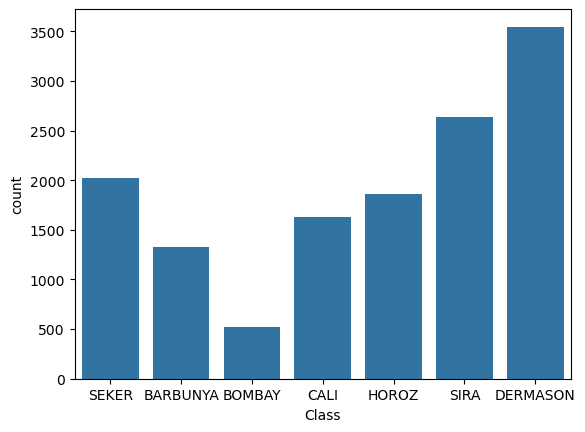

In [11]:
sns.countplot(x='Class', data = data)

In [12]:
labelencoder = LabelEncoder()
data["Class"] = labelencoder.fit_transform(data['Class'])

In [13]:
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966908,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019,-0.475413
Perimeter,0.966908,1.000000,0.977561,0.914336,0.386097,0.391062,0.967871,0.991453,-0.020620,-0.304662,-0.548336,-0.407426,-0.865756,-0.768590,-0.408888,-0.431215,-0.508315
MajorAxisLength,0.932623,0.977561,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464,-0.456515
MinorAxisLength,0.952041,0.914336,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402,-0.458347
AspectRation,0.243698,0.386097,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598,-0.119588
Eccentricity,0.268580,0.391062,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611,-0.202824
ConvexArea,0.999940,0.967871,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302,-0.477624
EquivDiameter,0.984998,0.991453,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693,-0.481452
Extent,0.054648,-0.020620,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622,-0.030855
Solidity,-0.197333,-0.304662,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150,0.323356


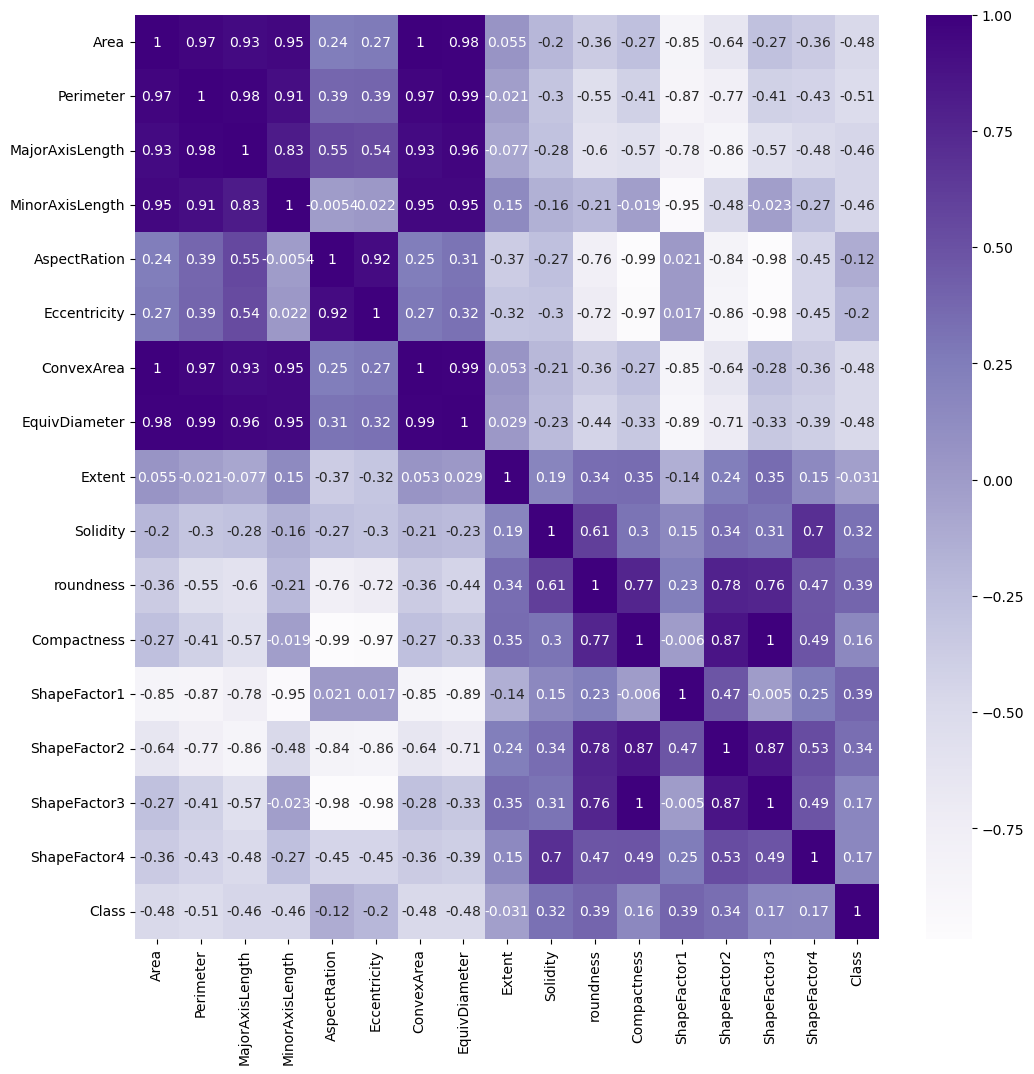

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Purples)
plt.show()

In [15]:
x = data.iloc[:,0:16]
y = data.iloc[:,16:]

In [16]:
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [17]:
y

,Class
0,5
1,5
2,5
3,5
4,5
...,...
13606,3
13607,3
13608,3
13609,3


In [18]:
x = SelectKBest(chi2, k=12).fit_transform(x, y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [20]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

# KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors = 35, metric = 'manhattan')
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)
y_predict

array([5, 0, 3, ..., 2, 4, 2])

In [22]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9087248322147651

In [23]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 363,    0,   61,    0,    1,    6,   16],
       [   0,  177,    0,    0,    0,    0,    0],
       [  17,    0,  499,    0,    8,    1,    7],
       [   0,    0,    0, 1054,    2,   20,   76],
       [   3,    0,    9,    4,  584,    0,   21],
       [   2,    0,    0,   17,    0,  624,   21],
       [   2,    0,    2,   87,   12,   13,  761]], dtype=int64)

# GAUSSİANNAİVEBAYES

In [24]:
gnb = GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_predict = gnb.predict(x_test)
y_predict

array([5, 0, 3, ..., 2, 4, 2])

In [25]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8868008948545861

In [26]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[354,   0,  73,   0,   1,   2,  17],
       [  0, 177,   0,   0,   0,   0,   0],
       [ 48,   1, 472,   0,   8,   1,   2],
       [  0,   0,   0, 996,   2,  29, 125],
       [  5,   0,   6,   6, 593,   0,  11],
       [  8,   0,   0,   8,   0, 622,  26],
       [ 10,   0,   4,  67,  26,  20, 750]], dtype=int64)

# LOGİSTİC REGRESSİON

In [27]:
logisticreg = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000)
logisticreg.fit(x_train,y_train.values.ravel())
y_predict = logisticreg.predict(x_test)
y_predict

array([5, 0, 3, ..., 2, 4, 2])

In [28]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9098434004474273

In [29]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 392,    0,   36,    0,    1,    3,   15],
       [   0,  177,    0,    0,    0,    0,    0],
       [  22,    0,  493,    0,    8,    1,    8],
       [   0,    0,    0, 1043,    2,   17,   90],
       [   2,    0,    6,    6,  594,    0,   13],
       [   6,    0,    0,   16,    0,  620,   22],
       [   4,    0,    2,   77,   24,   22,  748]], dtype=int64)

# SUPPORT VECTOR MACHİNE

In [30]:
supportvector = SVC(kernel="rbf")
supportvector.fit(x_train,y_train.values.ravel())
y_predict = supportvector.predict(x_test)
y_predict

array([5, 0, 3, ..., 2, 4, 2])

In [31]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9145413870246085

In [32]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 384,    0,   46,    0,    2,    4,   11],
       [   0,  177,    0,    0,    0,    0,    0],
       [  18,    0,  499,    0,    8,    1,    6],
       [   0,    0,    0, 1058,    3,   13,   78],
       [   3,    0,    8,    4,  586,    0,   20],
       [   5,    0,    0,   20,    0,  620,   19],
       [   4,    0,    0,   79,   15,   15,  764]], dtype=int64)

# RANDOM FOREST

In [33]:
randomforest = RandomForestClassifier(criterion = 'entropy',n_estimators = 10,random_state = 42)
randomforest.fit(x_train,y_train.values.ravel())
y_predict = randomforest.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9049217002237137

In [35]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 390,    0,   44,    0,    2,    2,    9],
       [   1,  176,    0,    0,    0,    0,    0],
       [  31,    0,  485,    0,    9,    1,    6],
       [   0,    0,    0, 1070,    2,   19,   61],
       [   5,    0,    9,    5,  583,    0,   19],
       [   8,    0,    1,   23,    0,  610,   22],
       [   6,    0,    2,   96,   19,   23,  731]], dtype=int64)

# DECİSİON TREE

In [36]:
decisiontree = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
decisiontree.fit(x_train,y_train.values.ravel())
y_predict = decisiontree.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8825503355704698

In [38]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 380,    0,   50,    0,    2,    7,    8],
       [   1,  176,    0,    0,    0,    0,    0],
       [  32,    0,  477,    0,   17,    1,    5],
       [   1,    0,    0, 1030,    7,   18,   96],
       [   5,    0,   13,    5,  581,    1,   16],
       [  10,    0,    0,   36,    0,  592,   26],
       [   8,    0,    4,  101,   20,   35,  709]], dtype=int64)